## Billboard 100 Exploration

I recently looked into a dataset which lists all songs that made the Billboard Top 100 list in the year 2000.  The data
tracks each song from the date it entered up to 76 weeks afterwards (although no songs made it past 65 weeks).  

The dataset is what I consider 'healthy'.  There are no missing values and the data doesn't appear corrupted in any way.  It does lack in metrics we want to use and explore, however, we are able to derive some of these datapoints from what we do have.  Fields I derived are:
    > Days to Peak
    > Peak Rank
    > Debut Month
    > Debut Quarter
    > Weeks in Top 100
        *To see an explanation to how I derived these datapoints see the footer*

Using this data I've created some visualizations that show us hoe songs move through the Top 100 list over time and tell us when the most #1 hits debuted over the course of the year.  We'll also see how top rank relates to number of weeks in the top 100!

In [28]:
#importing packages and libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_palette(sns.color_palette("husl", 8))
sns.set_style("darkgrid")
%matplotlib inline  

In [29]:
billboard = pd.read_csv("./billboard.csv") #import data CSV

In [30]:
week_column_list = list(billboard.columns[7:]) #sets up list to let me pick only weekly ranking data columns

#sets up days to peak, debut month, and debut quarter fields
billboard['date.entered'] = pd.to_datetime(billboard['date.entered'])
billboard['date.peaked'] = pd.to_datetime(billboard['date.peaked'])
billboard['days_to_peak'] = (billboard["date.peaked"]-billboard['date.entered']).dt.days
billboard["debut quarter"] = billboard["date.entered"].dt.quarter
billboard["debut month"] = billboard["date.entered"].dt.month

#sets up peak_rank field
billboard['peak_rank'] = billboard[list(billboard.ix[:,week_column_list].columns)].min(axis=1)
#sets up weeks in top 100 field
billboard['weeks in top 100'] = billboard[list(billboard.ix[:,week_column_list].columns)].count(axis=1)


Looking into the number of days after a song's debut we find that most of the time the higher a song's top rank on the billboard 100, the longer it takes to reach it's peak.  

For example, most songs that reach the Top 10 take at least 50 days to get there. The difference in speed to peak is especially apparent between songs that peak below the Top 50 vs songs that peak within the Top 10.

The following plot shows the distributions of Days to Peak for all songs in 2000, songs that reached the top 10, and songs that didn't break the Top 50.

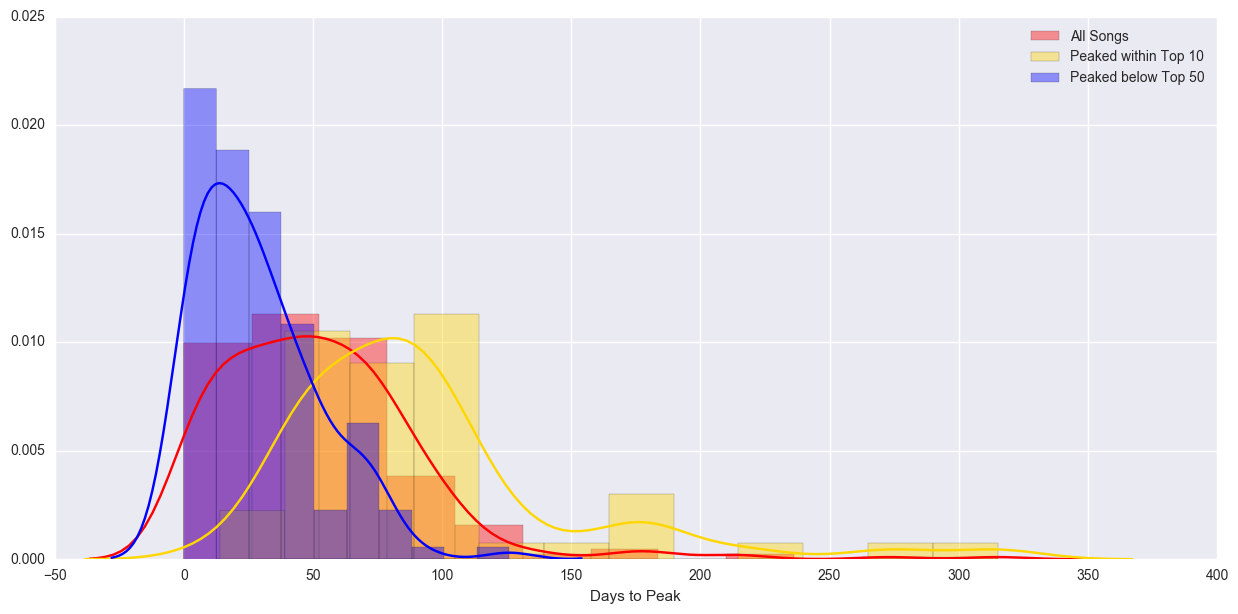

In [31]:
top_10_billboard = billboard[billboard["peak_rank"]<=10]
top_51_thru_100 = billboard[billboard["peak_rank"] > 50]
plt.figure(figsize=(15,7))
sns.distplot(billboard['days_to_peak'],bins=12, label='All Songs',color='r')
sns.distplot(top_10_billboard['days_to_peak'],bins=12, label="Peaked within Top 10",color='gold')
sns.distplot(top_51_thru_100['days_to_peak'], label="Peaked below Top 50",color='b')
plt.xlabel("Days to Peak")
plt.legend()
plt.show()
#plt.savefig('output.png', dpi=300)

The next thing we looked at was seasonality.  I was curious if there's an ideal time of year to debut on the list.  It turned out that in 2000 songs to reach the #1 spot on Billboard 100 debuted in the spring.

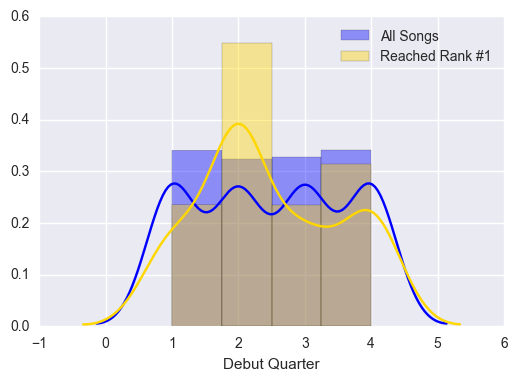

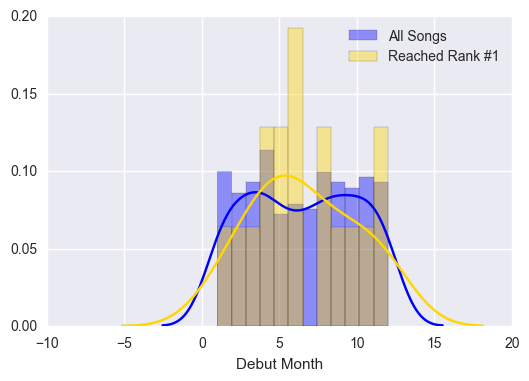

In [45]:
reached_rank_1 = billboard[billboard["peak_rank"]==1]


sns.distplot(billboard["debut quarter"],color='blue',label = "All Songs")
sns.distplot(reached_rank_1["debut quarter"],color='gold',label="Reached Rank #1")
plt.xlabel("Debut Quarter")
plt.legend()
plt.show()


sns.distplot(billboard["debut month"],color='blue',bins=12,label="All Songs")
sns.distplot(reached_rank_1["debut month"],color='gold',bins=12,label="Reached Rank #1")
plt.xlabel("Debut Month")
plt.legend()
plt.show()


While looking at songs which reached the #1 spot, let's look at what the journey to the top looks like.  Most have a steep climb to the top and then peter out.

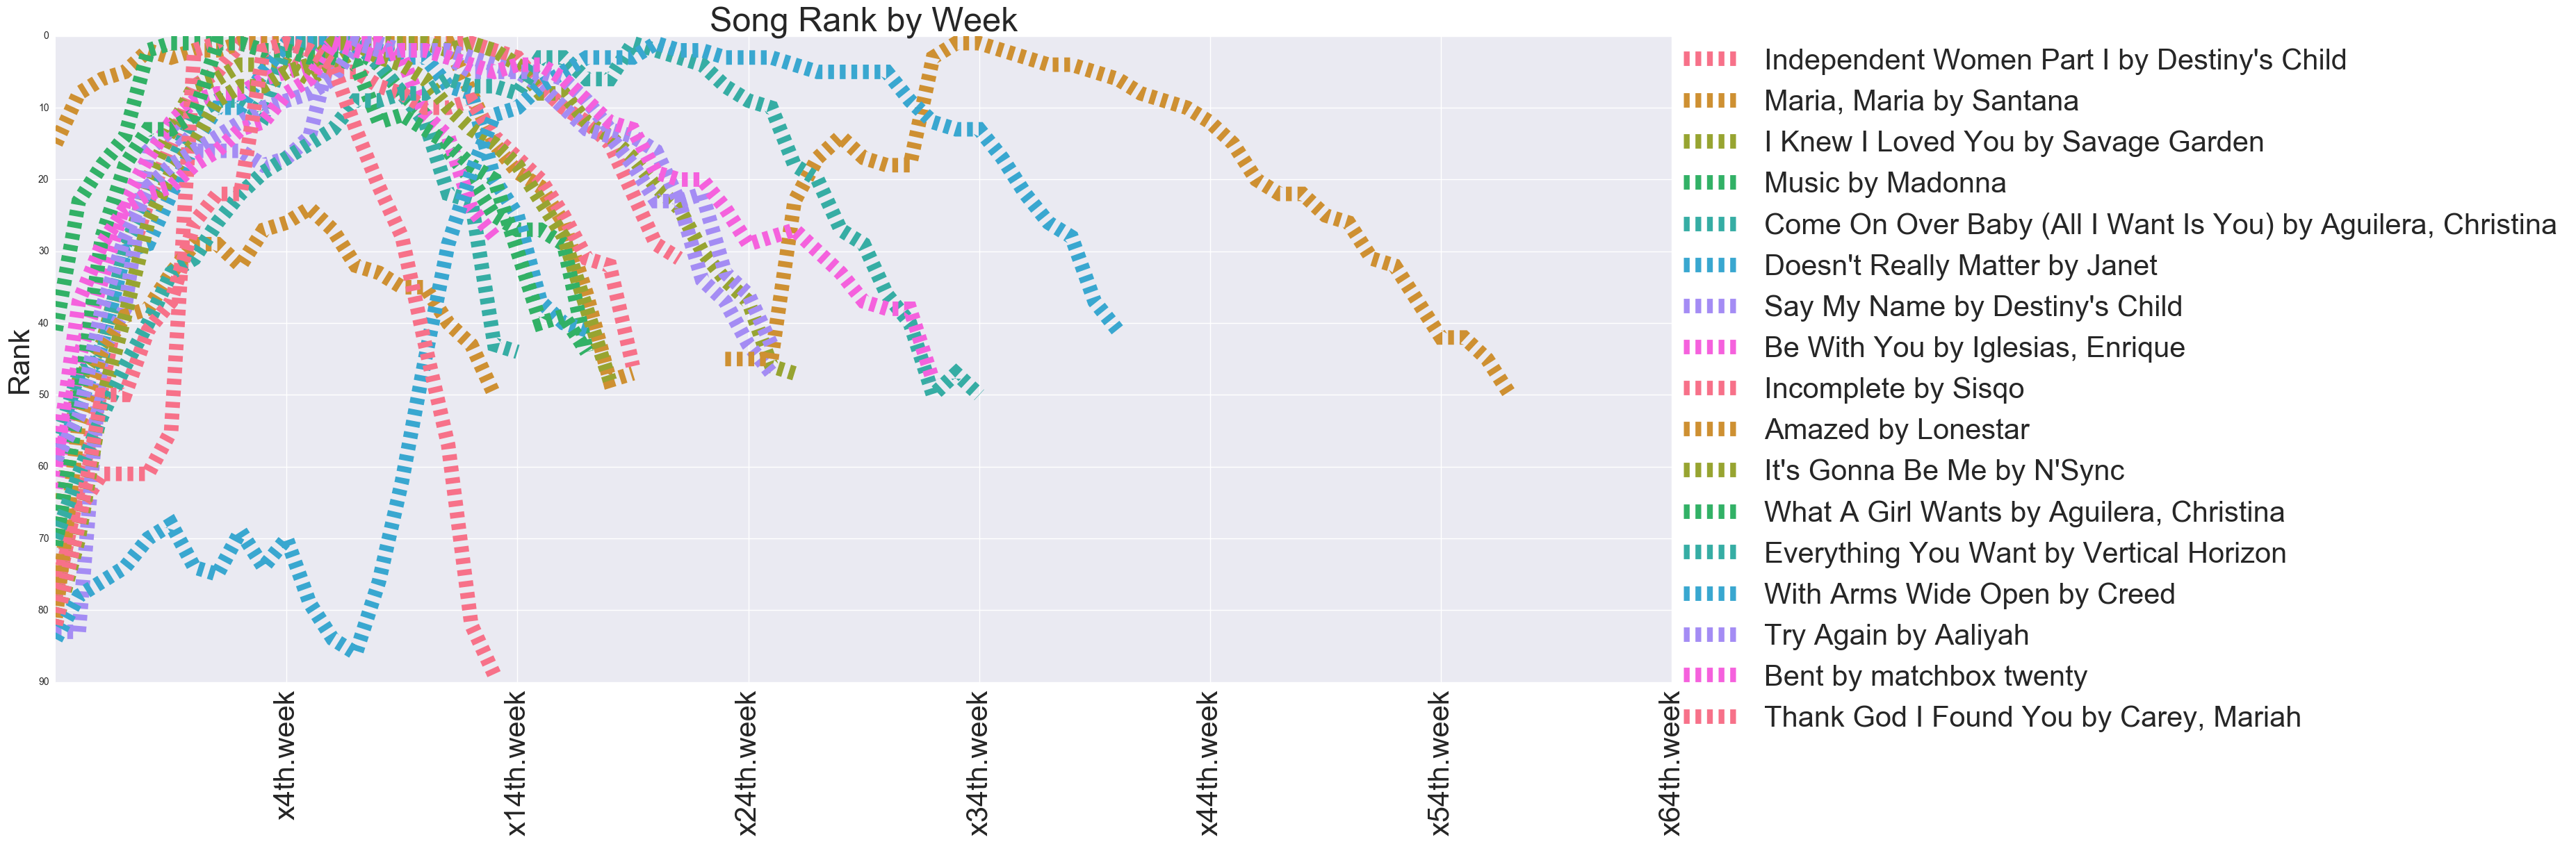

In [40]:
reached_rank_1 = billboard[billboard['peak_rank']==1]
plt.figure(figsize=(30,12))

#plot a line for each song that reached #1 and track it's progress over the weeks since entering
for i in range(len(reached_rank_1)):
    plt.plot(range(len(reached_rank_1.ix[0,week_column_list])),reached_rank_1.ix[:,week_column_list].values[i],label=str(reached_rank_1.ix[i,2])+" by "+str(reached_rank_1.ix[i,1]),linewidth=15,ls="--",dash_joinstyle="miter")

plt.xticks(range((len(reached_rank_1.ix[0,week_column_list])-1))[10::10],reached_rank_1.columns[10::10],rotation=90,fontsize=30)
plt.gca().invert_yaxis()
plt.title("Song Rank by Week",fontsize=35)
plt.ylabel("Rank",fontsize=30)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,fontsize=30)
plt.show()

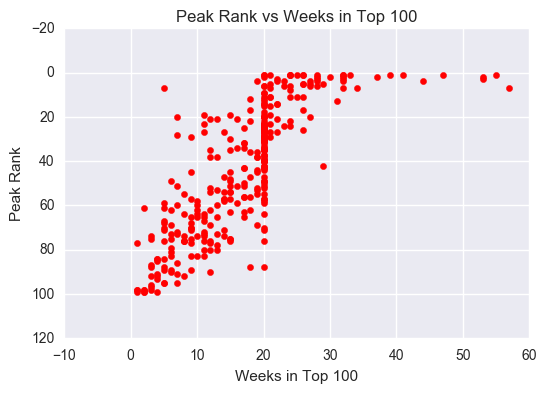

In [43]:
#does a song's top rank influence it's longevity on the Top 100

plt.scatter(y=billboard['peak_rank'],x=billboard['weeks in top 100'],color='r')
plt.title("Peak Rank vs Weeks in Top 100")
plt.ylabel("Peak Rank")
plt.xlabel("Weeks in Top 100")
plt.gca().invert_yaxis()
plt.show()

In [35]:
To derive the 'Days to Peak' field we first convert the 'date.entered' and 'date.peaked' fields to the datetime datatype.  Then we assign the day value of the difference between them to our new field:

    #convert the date fields into datetime datatypes
    billboard['date.entered'] = pd.to_datetime(billboard['date.entered'])
    billboard['date.peaked'] = pd.to_datetime(billboard['date.peaked'])

    #create new field that calculates difference between peak and entrance date
    billboard['days_to_peak'] = (billboard["date.peaked"]-billboard['date.entered']).dt.days

Getting the Peak Rank we find the minimum value through the week columns:

    billboard['top_rank'] = billboard[list(billboard.ix[:,week_column_list].columns)].min(axis=1)


To create the debut month and quarter fields we take the quarter and month attibutes of the date.'entered' field:

    billboard["debut quarter"] = billboard["date.entered"].dt.quarter
    billboard["debut month"] = billboard["date.entered"].dt.month
    
To find the number of weeks a song was in the Top 100 we count the number of values within the weekly rank columns:

    billboard['weeks in top 100'] = billboard[list(billboard.ix[:,week_column_list].columns)].count(axis=1)
    
    



SyntaxError: invalid syntax (<ipython-input-35-5961066ef753>, line 1)